From the "Supersolid symmetry breaking from compressional oscillations in a dipolar quantum gas" paper (link here [https://arxiv.org/abs/1906.02791](https://arxiv.org/abs/1906.02791)), the authors say:

"The equilibrium density configuration is found by fixing the equation parameters to the values available in the experiments, and then evolving the eGPE in imaginary time. We consider $\mathrm{N}=35000$ atoms of ${ }^{162} \mathrm{Dy}$, for which $a_{d d}=130 a_0\left(a_0\right.$ is the Bohr radius). The trapping frequencies are $\omega_{x, y, z}=2 \pi(18.5,53,81) \mathrm{Hz}$, and $a_s$ is changed to tune the value of $\epsilon_{d d}$."



# import modules

In [39]:
import matplotlib.pyplot as plt
import numpy as np


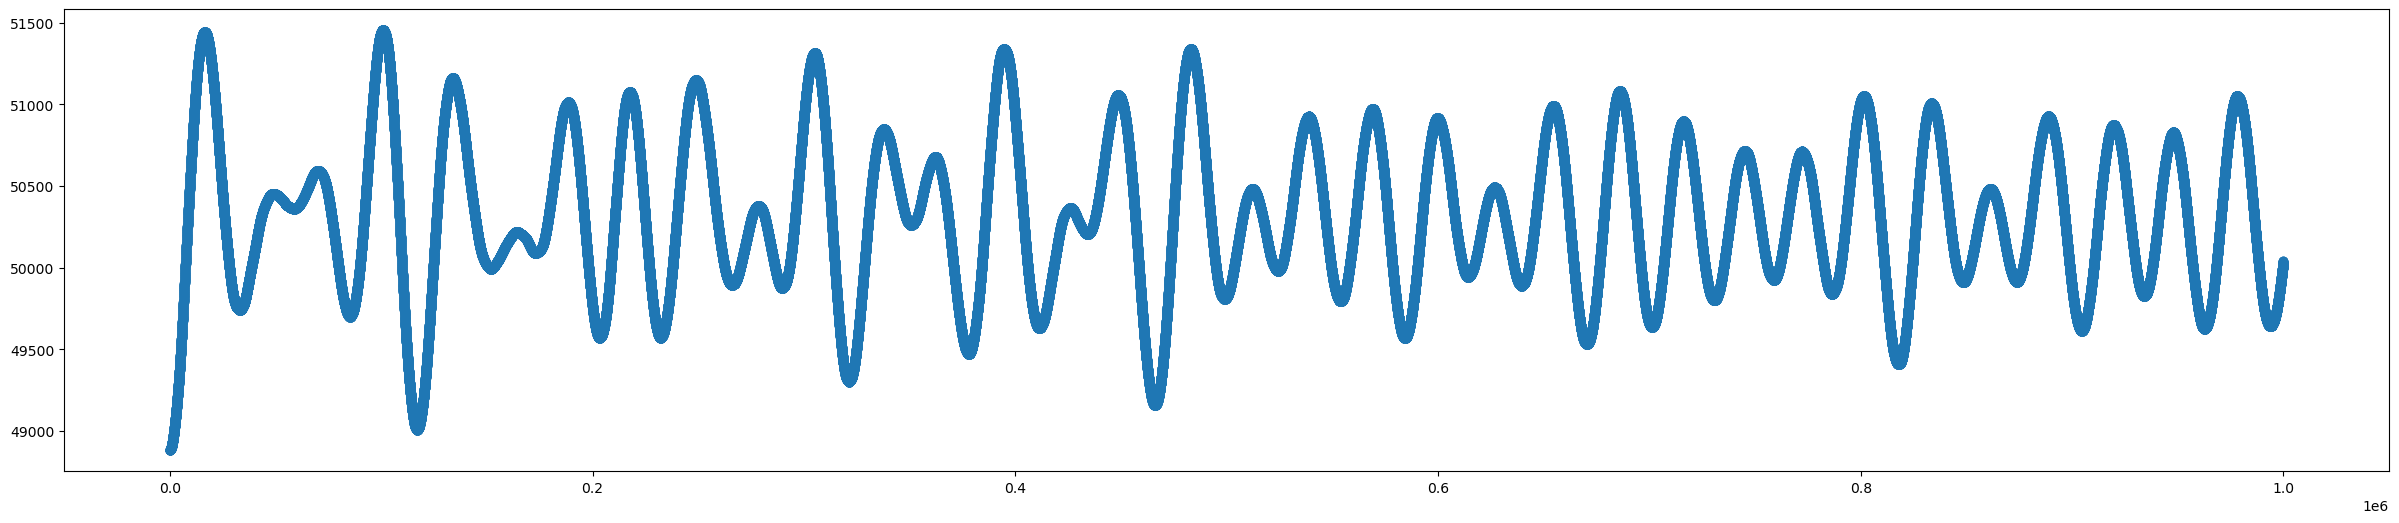

In [47]:
# Load file 2-real-time/snapshots_time_evolution_0/x2.txt
data = np.loadtxt('2-real-time/snapshots_time_evolution_0/x2.txt')
step = data[:,0]
x2 = data[:,1]

plt.figure(figsize=(30, 6))
plt.plot(step, x2, marker='o')

(0.0, 0.001)

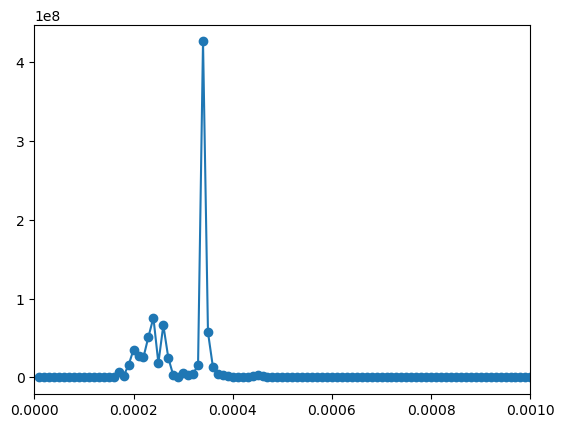

In [42]:
# remove k=0 mode
x2_no_k0 = x2 - np.mean(x2)
x2_no_k0 = x2_no_k0 / np.max(x2_no_k0)


# Calculate the fft of x2, and plot the power spectrum
fft = np.fft.fft(x2_no_k0)
freq = np.fft.fftfreq(len(x2_no_k0))

# mask out negative frequencies
mask = freq > 0
fft = fft[mask]
freq = freq[mask]

plt.plot(freq, np.abs(fft)**2, marker='o')
plt.xlim(0, 0.001)

In [44]:
# Find two peaks in the power spectrum
# The first peak corresponds to the frequency of the droplet oscillation
# The second peak corresponds to the frequency of the supersolid phase

idx = np.argsort(np.abs(fft)**2)
supersolid_freq, classical_freq = freq[idx[-1]], freq[idx[-2]]
supersolid_freq, classical_freq

(0.00034, 0.00024000000000000003)

In [45]:
# save the frequencies to a file in folder 3-analyze-frequency
# if the folder does not exist, create it
import os
if not os.path.exists('3-analyze-frequency'):
    os.makedirs('3-analyze-frequency')

np.savetxt('3-analyze-frequency/frequencies.txt', [supersolid_freq, classical_freq])
